##讀取資料

In [80]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas.core.indexes.extension import deprecate_ndim_indexing

msft = yf.Ticker("AAPL")

# get stock info
msft.info

# get historical market data(取得歷史資料)
hist = msft.history(period="1y") #1y = 1 year
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-26 00:00:00-05:00,158.649250,159.524162,155.457766,155.905167,76959800,0.0,0
2021-11-29 00:00:00-05:00,158.450379,160.259884,157.873723,159.315369,88748200,0.0,0
2021-11-30 00:00:00-05:00,159.066804,164.564893,158.997201,164.346161,174048100,0.0,0
2021-12-01 00:00:00-05:00,166.513583,169.317318,163.580609,163.819229,152052500,0.0,0
2021-12-02 00:00:00-05:00,157.824041,163.252527,156.889462,162.815063,136739200,0.0,0
...,...,...,...,...,...,...,...
2022-11-18 00:00:00-05:00,152.309998,152.699997,149.970001,151.289993,74794600,0.0,0
2022-11-21 00:00:00-05:00,150.160004,150.369995,147.720001,148.009995,58724100,0.0,0
2022-11-22 00:00:00-05:00,148.130005,150.419998,146.929993,150.179993,51804100,0.0,0


In [82]:
# 設定 V0=平均值
V0 = hist["Volume"].mean() 

In [83]:
hist['Date'] = hist.index #將index 移到 Columns
data = hist[["Close", "Volume", "Date"]] #收盤價格， 交易量， 交易日期

In [84]:
ddate = list(hist[["Date"]].iloc[:, 0]) # 交易日期
close = list(hist[["Close"]].iloc[:, 0]) # 收盤價格
volume = list(hist[["Volume"]].iloc[:, 0]) # 成交量

In [85]:
data.shape

(252, 3)

# 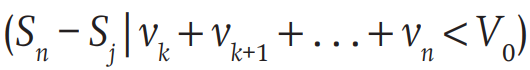

In [86]:
# Vk+(Vk+1)+...+Vn
data["Volume"].sum() 

22909696400

In [87]:
## Vk+(Vk+1)+...+Vn

print(data.iloc[0, 1])  #第一筆""Volume"
print(data.iloc[-1, 1])  #最後一筆"Volume"
print(data.iloc[data.shape[0]-1, 1])  #data.shape[0]-1 = (252-1) , 1 = 第一列(總共有0、1列)
s_sum = 0
for i in range(0, data.shape[0]):
  s_sum = s_sum + data.iloc[i, 1]
print(s_sum)

76959800
35195900
35195900
22909696400


In [88]:
# for j in range(0, data.shape[0]):
#   print( int(data.iloc[j, 0]), int(data.iloc[j, 1]))
# if(s_sum < V0):
print(data.iloc[251, 0]- data.iloc[0, 0]) #最後一筆-第一筆

-7.795166015625


#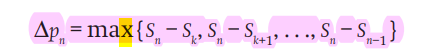

In [89]:
s_diff = []
s_date = []

for n in range(0, data.shape[0]):

  v_sum=0

  for j in range(n, 0, -1):
    
    v_sum=0

    if (v_sum < V0):
      v_sum = v_sum + data.iloc[j, 1]
      s_diff.append(data['Close'].iloc[n] - data['Close'].iloc[j])
      # s_date.append(data['Data'][data.index(max(data['Close'])), data.index(min(data['Close'])))
      s_date.append([(ddate[(close.index(max(close)))]), (ddate[(close.index(min(close)))])])

    else:
      v_sum = 0
      break
print(max(s_diff))
print(s_date[0])

44.596435546875
[Timestamp('2022-01-03 00:00:00-0500', tz='America/New_York'), Timestamp('2022-06-16 00:00:00-0400', tz='America/New_York')]


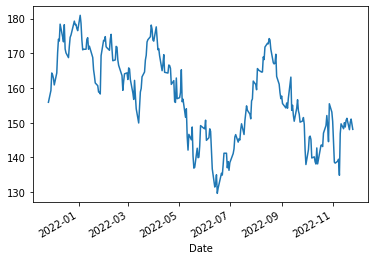

In [90]:
data['Close'].plot()

In [91]:
print(data['Close'].max()) #最高收盤價
print(data['Close'].min()) #最低收盤價
print((data['Close'].max())-(data['Close'].min())) #最大價差

180.95974731445312
129.66448974609375
51.295257568359375
